Sumbu Utama  dan  Kelas memiliki hubungan korelasi sebesar  -0.7130906104204594
Korelasi berbanding terbalik
Korelasi cukup kuat


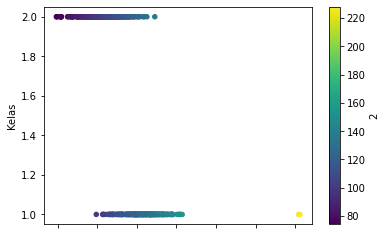

In [27]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
mapping={0 : "id",
         1 : "Daerah",
         2 : "Sumbu Utama",
         3 : "Sumbu Kecil",
         4 : "Keunikan",
         5 : "Area Bulatan",
         6 : "Diameter",
         7 : "Kadar Air",
         8 : "Keliling",
         9 : "Bulatan",
         10 : "Ransum",
         11 : "Kelas"}
file="Gandum.csv"
df=pd.read_csv(file, header = None)
n=df.shape[1]

def DrawBoxplot(i):
    sns.boxplot(data=df[i])
    plt.title(mapping[i])
    plt.ylabel("Besar")
    
def DescribeData(i):
    data=df[i]
    index=pd.DataFrame(data)
    print("Rata-rata " + mapping[i] + " : " + str(data.mean()))
    print("Nilai Tengah " + mapping[i] + " : " + str(data.median()))
    if(data[data==index.value_counts().idxmax()].shape[0]!=1):
        print("Modus "+ mapping[i] + " : (Kolom kiri : indeks modus dimulai dari 0, Kolom kanan : modus)" )
        print(data.mode())
        print("Jumlah kemunculan modus : "+str(data[data==index.value_counts().idxmax()].shape[0]))
    else:
        print("Data tidak memiliki modus karena semua elemen bersifat unik")
    print("Standar Deviasi " + mapping[i] + " : " + str(data.std()))
    print("Variansi " + mapping[i] + " : " + str(data.var()))
    print("Range " + mapping[i] + " : " + str(data.max()-data.min()))
    print("Nilai Minimum " + mapping[i] + " : " + str(data.min()))
    print("Nilai Maksimum " + mapping[i] + " : " + str(data.max()))
    print("Quartil " + mapping[i] + " : ")
    print("\tQ1 : ",np.quantile(data, .25))
    print("\tQ2 : ",np.quantile(data, .50))
    print("\tQ3 : ",np.quantile(data, .75))
    print("IQR " + mapping[i] + " : "+ str(np.quantile(data, .75)-np.quantile(data, .25)))
    print("Skewness " + mapping[i] + " : "+ str(data.skew()))
    print("Kurtosis " + mapping[i] + " : "+ str(data.kurtosis()))
    print()
    
def DrawHistogram(i):
    df.hist(i,edgecolor='k')
    plt.title(mapping[i])
    plt.xlabel("Besar")
    plt.ylabel("jumlah")

#5.a Nilai rata-rata disuatu daerah diatas 4700
def Answer4a():
    print("Jawaban pertanyaan No.4 bagian a")
    μ0=4700
    print("H0 : μ = 4700")
    print("H1 : μ > 4700")
    print("α = 0.05")
    print("Daerah kritis z>z(0.05)=1.645 karena P(Z<1.645)=0.95")
    z=(df[1].mean()-μ0)/(df[1].std()/500**0.5)
    print("z = ",z)
    if (z>1.645):
        print("Tolak H0 karena nilai uji = z > 1.645")
        print("Jadi, hipotesis Nilai rata-rata di suatu daerah diatas 4700 bisa dikatakan benar")
    else:
        print("Tidak menolak H0 karena nilai uji z < 1.645")
        print("Jadi, hipotesis Nilai rata-rata di suatu daerah diatas 4700 tidak bisa dikatakan benar")
    print()
    
def Answer4c():
    print("Jawaban pertanyaan No.4 bagian c")
    newdata=df[3].head(20)
    μ0=50
    print("H0 : μ = 50")
    print("H1 : μ ≠ 50")
    print("α = 0.05")
    print("Daerah kritis z>(z(0.05/2))= 1.96 karena P(Z<1.96)=0.975 atau z < -1.96")
    z=(newdata.mean()-μ0)/(newdata.std()/20**0.5)
    print("z = ",z)
    if (z>1.96 or z<-1.96):
        print("Tolak H0 karena nilai uji = ",z," berada di titik kritis")
        print("Jadi, hipotesis 20 baris pertama kolom Sumbu Kecil bukan 50 bisa dikatakan benar")
    else:
        print("Tidak menolak H0 karena nilai uji : -1.96 < z < 1.96")
        print("Jadi, hipotesis 20 baris pertama kolom Sumbu Kecil bukan 50 tidak bisa dikatakan benar")
    print()
    
def Answer4e():
    print("Jawaban pertanyaan No.4 bagian e")
    newdata=df[8]
    p0=0.05
    q0=1-p0
    n=df[8].shape[0]
    x=(pd.DataFrame(newdata[newdata<100]).count().sum())
    print("H0 : p = 0.05")
    print("H1 : p < 0.05")
    print("α = 0.05")
    print("Daerah kritis z<-z(0.05)=-1.645 karena P(Z<1.645)=0.95")
    z=(x-n*p0)/((n*p0*q0)**0.5)
    print("z = ",z)
    if (z<-1.96):
        print("Tolak H0 karena nilai uji = z < -1.645")
        print("Jadi, hipotesis Proporsi nilai Keliling yang kurang dari 100 adalah kurang dari 5% bisa dikatakan benar")
    else:
        print("Tidak menolak H0 karena nilai uji  z > -1.645")
        print("Jadi, hipotesis Proporsi nilai Keliling yang kurang dari 100 adalah kurang dari 5% tidak bisa dikatakan benar")
    print()

def Answer5b():
    print("Jawaban pertanyaan No.5 bagian b")
    n=500
    data1=df[7][:n//2]
    data2=df[7][n//2:]
    n1=data1.shape[0]
    n2=data2.shape[0]
    μ1=data1.mean()
    μ2=data2.mean()
    
    var1=data1.var()
    var2=data2.var()

    d0=-0.03
    print("H0 : μ1-μ2 = 0.2")
    print("H1 : μ1-μ2 ≠ 0.2")
    print("α = 0.05")
    print("Daerah kritis z>(z(0.05/2))= 1.96 karena P(Z<1.96)=0.975 atau z < -1.96")
    z=((μ1-μ2)-d0)/(var1/n1 + var2/n2)**0.5
    print("z = ",z)
    if (z>1.96 or z<-1.96):
        print("Tolak H0 karena nilai uji = ",z," berada di titik kritis")
        print("Jadi, hipotesis rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2 tidak bisa dikatakan benar")
    else:
        print("Tidak menolak H0 karena nilai uji : -1.96 < z < 1.96")
        print("Jadi, hipotesis rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.2 bisa dikatakan benar")
    print()
    
def Answer5d():
    print("Jawaban pertanyaan No.5 bagian d")
    n=500
    data1=df[10][:n//2]
    data2=df[10][n//2:]
    n1=data1.shape[0]
    n2=data2.shape[0]  
    p1=pd.DataFrame(data1[data1>2]).count().sum()/n1
    p2=pd.DataFrame(data2[data2>2]).count().sum()/n2
    p=(pd.DataFrame(data1[data1>2]).count().sum()+pd.DataFrame(data2[data2>2]).count().sum())/(n1+n2)
    q=1-p
    print("H0 : p1=p2")
    print("H1 : p1>p2")
    print("α = 0.05")
    print("Daerah kritis z>z(0.05)=1.645 karena P(Z<1.645)=0.95")
    z=(p1-p2)/((p*q*(1/n1+1/n2))**0.5)
    print("z = ",z)
    if (z>1.645):
        print("Tolak H0 karena nilai uji = z > 1.645")
        print("Jadi, hipotesis Proporsi nilai bagian awal Ransum yang lebih dari 2 lebih besar daripada proporsi nilai yang sama di bagian akhir Ransum bisa dikatakan benar")
    else:
        print("Tidak menolak H0 karena nilai uji z < 1.645")
        print("Jadi, hipotesis Proporsi nilai bagian awal Ransum yang lebih dari 2 lebih besar daripada proporsi nilai yang sama di bagian akhir Ransum tidak bisa dikatakan benar")
    print()
    
def DrawScatter(i):
    df.plot.scatter(x=i,y=11,c=i,colormap="viridis")
    plt.xlabel(mapping[i])
    plt.ylabel("Kelas")

def Correlation(i):
    a=df[i]
    b=df[11]
    corr=np.corrcoef([a,b])[0,1]
    print(mapping[i]," dan ",mapping[11], "memiliki hubungan korelasi sebesar ",corr)
    if (corr>0):
        print("Korelasi berbanding lurus")
    elif (corr==0):
        print("Tidak memiliki korelasi")
    else:
        print("Korelasi berbanding terbalik")
    if(abs(corr)<0.25):
        print("Korelasi sangat lemah atau tidak berkorelasi")
    elif (0.25<=abs(corr)<0.5):
        print("Korelasi sedang")
    elif (0.5<=abs(corr)<0.75):
        print("Korelasi cukup kuat")
    else:
        print("Korelasi sangat kuat")
    DrawScatter(i)

# 

In [52]:
DescribeData(8)

Rata-rata Keliling : 281.4797219999999
Nilai Tengah Keliling : 280.0455
Data tidak memiliki modus karena semua elemen bersifat unik
Standar Deviasi Keliling : 37.33540171514401
Variansi Keliling : 1393.9322212311781
Range Keliling : 291.822
Nilai Minimum Keliling : 197.015
Nilai Maksimum Keliling : 488.837
Quartil Keliling : 
	Q1 :  255.883
	Q2 :  280.0455
	Q3 :  306.0625
IQR Keliling : 50.17949999999999
Skewness Keliling : 0.7336269072005543
Kurtosis Keliling : 2.272684731245573

